In [33]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("../c3o-experiments-main/kmeans.csv")
advertising

,instance_count,machine_type,slots,memory,data_size_MB,features,observations,k,gross_runtime
0,2,m4.2xlarge,16,64000,8000,5,150000000,3,1126
1,2,m4.2xlarge,16,64000,8000,5,150000000,3,1127
2,2,m4.2xlarge,16,64000,8000,5,150000000,3,1151
3,2,m4.2xlarge,16,64000,8000,5,150000000,3,1156
4,2,m4.2xlarge,16,64000,8000,5,150000000,3,1216
...,...,...,...,...,...,...,...,...,...
895,12,r4.xlarge,48,366000,16000,5,150000000,3,228
896,12,r4.xlarge,48,366000,16000,5,150000000,3,230
897,12,r4.xlarge,48,366000,16000,5,150000000,3,232
898,12,r4.xlarge,48,366000,16000,5,150000000,3,234


In [34]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   instance_count  900 non-null    int64 
 1   machine_type    900 non-null    object
 2   slots           900 non-null    int64 
 3   memory          900 non-null    int64 
 4   data_size_MB    900 non-null    int64 
 5   features        900 non-null    int64 
 6   observations    900 non-null    int64 
 7   k               900 non-null    int64 
 8   gross_runtime   900 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 63.4+ KB


,instance_count,slots,memory,data_size_MB,features,observations,k,gross_runtime
count,900.000000,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000,900.000000
mean,7.000000,55.066667,413116.666667,18408.888889,7.000000,1.366667e+08,5.800000,533.698889
std,3.417549,27.460883,209825.534684,5900.465554,3.561005,3.638259e+07,2.287462,791.443029
min,2.000000,8.000000,61000.000000,8000.000000,5.000000,1.000000e+08,3.000000,94.000000
25%,4.000000,32.000000,244000.000000,13200.000000,5.000000,1.000000e+08,3.000000,182.000000
50%,7.000000,48.000000,366000.000000,18600.000000,5.000000,1.250000e+08,5.000000,246.000000
75%,10.000000,80.000000,610000.000000,21300.000000,10.000000,1.750000e+08,7.000000,434.500000
max,12.000000,96.000000,732000.000000,30500.000000,15.000000,2.000000e+08,9.000000,4556.000000


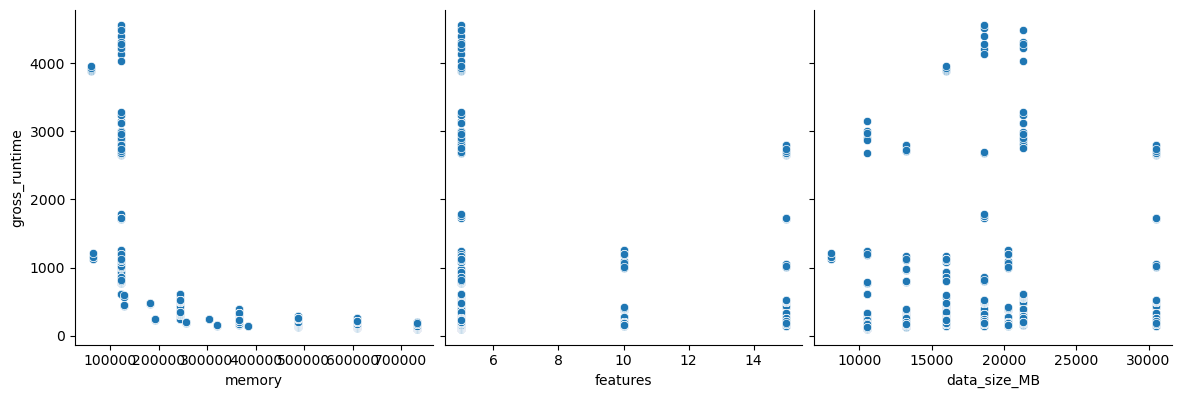

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['memory', 'features','data_size_MB'], 
             y_vars='gross_runtime', size=4, aspect=1, kind='scatter')
plt.show()

     instance_count machine_type  slots  memory  data_size_MB  features   
0                 2   m4.2xlarge     16   64000          8000         5  \
1                 2   m4.2xlarge     16   64000          8000         5   
2                 2   m4.2xlarge     16   64000          8000         5   
3                 2   m4.2xlarge     16   64000          8000         5   
4                 2   m4.2xlarge     16   64000          8000         5   
..              ...          ...    ...     ...           ...       ...   
895              12    r4.xlarge     48  366000         16000         5   
896              12    r4.xlarge     48  366000         16000         5   
897              12    r4.xlarge     48  366000         16000         5   
898              12    r4.xlarge     48  366000         16000         5   
899              12    r4.xlarge     48  366000         16000         5   

     observations  k  gross_runtime  
0       150000000  3           1126  
1       150000000  3   

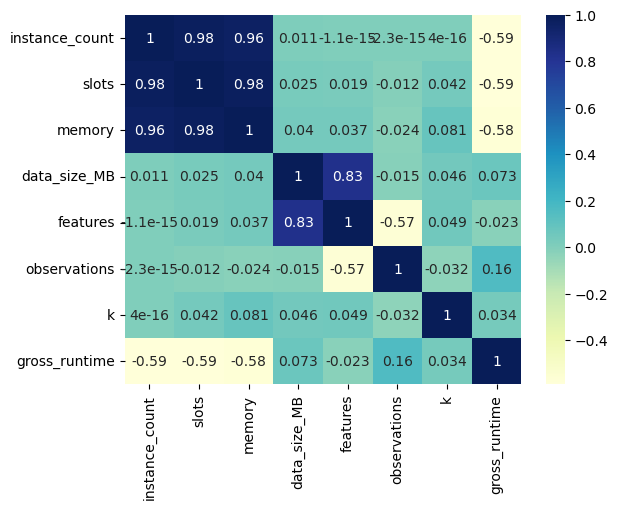

In [36]:
print(advertising)
advertising = advertising.drop(["machine_type" ], axis=1)
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [37]:
X = advertising['observations']
y = advertising['gross_runtime']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [39]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [40]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const           157.748645
observations      0.000003
dtype: float64

In [41]:
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gross_runtime   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.956
Date:                Wed, 07 Jun 2023   Prob (F-statistic):            0.00168
Time:                        09:30:49   Log-Likelihood:                -5044.4
No. Observations:                 630   AIC:                         1.009e+04
Df Residuals:                     628   BIC:                         1.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          157.7486    113.174      1.394      0.164     -64.497     379.994
observations  2.547e-06   8.07e-07      3.155      0.002    9.62e-07    4.13e-06
==============================================================================
Omnibus:                      468.892   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5166.556
Skew:                           3.401   Prob(JB):                         0.00
Kurtosis:                      15.271   Cond. No.                     5.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

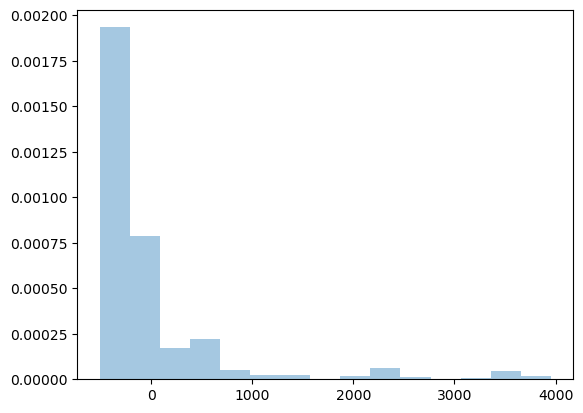

In [43]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

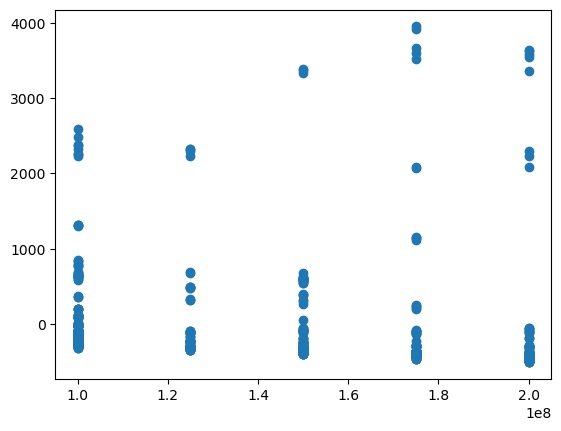

In [44]:
plt.scatter(X_train,res)
plt.show()

In [45]:
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred, y_test

(433    412.474681
 789    476.156191
 687    412.474681
 24     412.474681
 482    476.156191
           ...    
 277    412.474681
 105    667.200718
 487    476.156191
 278    412.474681
 69     603.519209
 Length: 270, dtype: float64,
 433     314
 789     172
 687     176
 24     2970
 482     178
        ... 
 277     426
 105    3116
 487     186
 278     432
 69     1780
 Name: gross_runtime, Length: 270, dtype: int64)

In [46]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.023605134848488696